In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [54]:
# Checking the number of mice
total_mouse = len(merge_data["Mouse ID"].unique())
print(total_mouse)

249


In [55]:
# Looked if there were any mouse id and timepoint duplicates to remove
mouse_duplicates = merge_data.loc[merge_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

clean_data = merge_data[merge_data["Mouse ID"].isin(mouse_duplicates) == False]

clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [56]:


# Check the number of mice again
total_clean_mouse = len(clean_data["Mouse ID"].unique())
print(total_clean_mouse)

248


In [57]:
# Grouped the DataFrame
grouped_drug = clean_data.groupby('Drug Regimen')

# Calculate the mean, median, standard deviation, and standard error
average_tumor = grouped_drug['Tumor Volume (mm3)'].mean()

median_tumor = grouped_drug['Tumor Volume (mm3)'].median()

variance_tumor = grouped_drug.var()['Tumor Volume (mm3)']

standard_deviation_tumor = grouped_drug.std()['Tumor Volume (mm3)']

standard_error_mean = grouped_drug.sem()['Tumor Volume (mm3)']

# Created a summary DataFrame
summary_df = pd.DataFrame({"Average Tumor": average_tumor,
                          "Median Tumor": median_tumor,
                          "Variance Tumor": variance_tumor,
                          "Standard Deviation of Tumor": standard_deviation_tumor,
                          "Standard Error of the Mean": standard_error_mean})

# Mapped the DataFrame
summary_df["Average Tumor"] = summary_df["Average Tumor"].map("{:.2f}".format) 
summary_df["Median Tumor"] = summary_df["Median Tumor"].map("{:.2f}".format)
summary_df["Variance Tumor"] = summary_df["Variance Tumor"].map("{:.2f}".format)
summary_df["Standard Deviation of Tumor"] = summary_df["Standard Deviation of Tumor"].map("{:.2f}".format)
summary_df["Standard Error of the Mean"] = summary_df["Standard Error of the Mean"].map("{:.2f}".format)

summary_df

,Average Tumor,Median Tumor,Variance Tumor,Standard Deviation of Tumor,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


<function matplotlib.pyplot.show(close=None, block=None)>

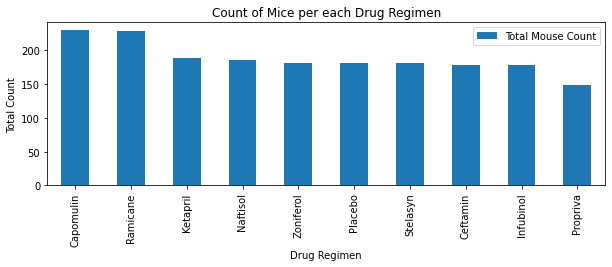

In [58]:
# Counted the values for each drug regimen
drug_counts = clean_data["Drug Regimen"].value_counts()

# Created a summary DataFrame
count_summary = pd.DataFrame({"Total Mouse Count": drug_counts})

# Plot the summary DataFrame to a bar graph
count_summary.plot(kind="bar", figsize=(10,3))


# Added title x and y label to the bar graph
plt.title("Count of Mice per each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Count")

plt.show

Text(0, 0.5, 'Total Count')

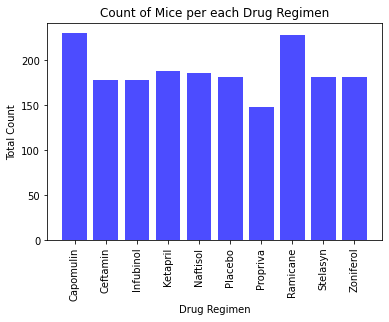

In [59]:
# Created a list with the drug regimen names
drug_names = summary_df.index.tolist()

# Counted the values for each drug regimen and added to a list
count_axis = (clean_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

# Set x-axis to drug names
x_axis = drug_names

# Plot the bar graph
plt.bar(x_axis, count_axis, color='b', alpha=0.7, align="center")

# Rotated drug names, added title, and added x and y label to the bar graph
plt.xticks(rotation='vertical')
plt.title("Count of Mice per each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Count")

Text(0.5, 1.0, 'Male Mice vs Female Mice')

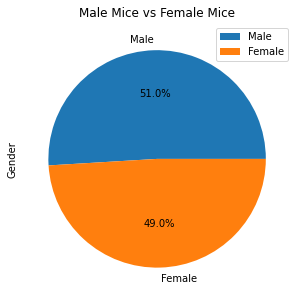

In [60]:
# Counted the values for each sex
gender_counts = clean_data['Sex'].value_counts()

# Created a summary DataFrame
gender_summary = pd.DataFrame({"Gender": gender_counts})

# Plot the summary DataFrame to a pie
plot = gender_summary.plot.pie(y='Gender', figsize=(5, 5), autopct="%1.1f%%")

# Adding a title
plt.title("Male Mice vs Female Mice")

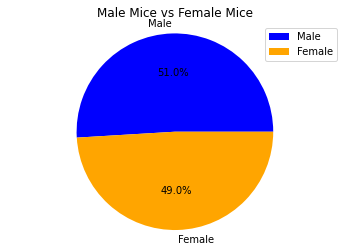

In [67]:
# Index the gender names to a list
label_names = gender_summary.index.tolist()

# Count the number of male and female mice
count_sex = clean_data['Sex'].value_counts().tolist()

# Set color
colors = ["blue", "orange"]

# Plot the list to a pie chart
text = plt.pie(count_sex, labels=label_names, colors=colors, autopct="%1.1f%%")

# Set title, legend, and circular pie chart
plt.title("Male Mice vs Female Mice")
plt.legend(label_names, loc='best')
plt.axis('equal')

# Show the pie chart
plt.show()